In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

In [2]:
with open('primitive_length.pkl', 'rb') as f:
    L = pickle.load(f)
f.close()

with open('noise_switch_time.pkl', 'rb') as f:
    switch_list = pickle.load(f)
f.close()
print(L)

[ 1  3  5  7  9 11 13 15 17 19 20 30 40 50 60 70 80 90]


F_Ciff = 1 - r =  0.660421478470459
A =  0.7925484559909487


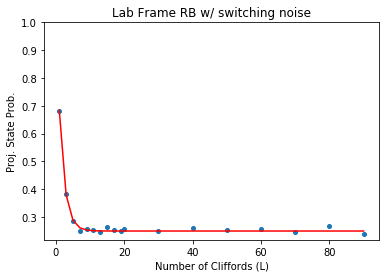

[0.68286963 0.38465413 0.28545163 0.24956208 0.25783827 0.25200755
 0.24698414 0.26404988 0.25259854 0.25041172 0.25568699 0.25003929
 0.2622664  0.2542754  0.25784606 0.24747092 0.26762008 0.24058147]
[0.43286962821162434, 0.13465412914728475, 0.03545163011509056, -0.000437918173893298, 0.007838271893058246, 0.0020075452208068723, -0.003015855541577045, 0.01404988276345931, 0.0025985386985027392, 0.0004117161415064241, 0.005686990842389883, 3.929062202001621e-05, 0.012266397143152918, 0.0042754026075870755, 0.007846059220140644, -0.0025290836832367602, 0.017620077682903246, -0.009418529970077194]
F_Ciff = 1 - r =  0.9094612066997845
A =  0.6065306597126334


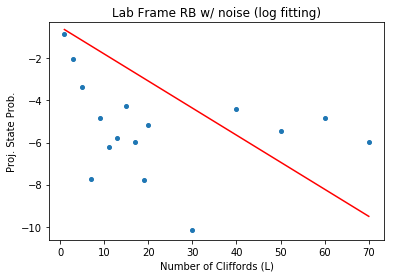

In [3]:
with open('1.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

y = data[1]
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
print("F_Ciff = 1 - r = ", 1 - popt[1])
print("A = ", popt[0])

plt.plot(L, y, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ switching noise")
plt.show()

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

y_fit = [p - 0.25 for p in y]
print(y)
print(y_fit)
y_fit = np.log(np.absolute(y_fit))
L = L[0:16]
y_fit = y_fit[0:16]
popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
r = 3/4 * (1 - np.exp(popt[1]))
print("F_Ciff = 1 - r = ", 1 - r)
print("A = ", np.exp(popt[0]))

plt.plot(L, y_fit, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=np.log(0.75))
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ noise (log fitting)")
plt.show()

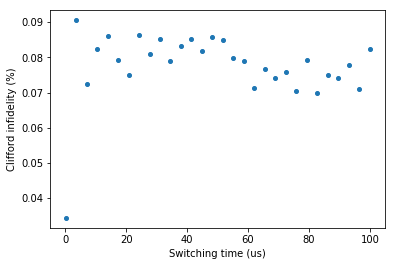

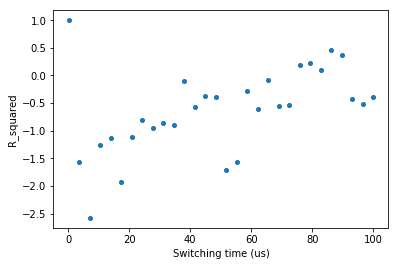

In [4]:
###############
# SRB with fixed B

# def func(x, A, r):
#     return  A * (1 - 4/3*r)**x + 0.25

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

F_Clifford = np.zeros(len(switch_list))
r_sqrd = np.zeros(len(switch_list))

for i in range(len(switch_list)):
    with open(str(i) + '.pkl', 'rb') as f:
        data = pickle.load(f)
    f.close()
    
    noise_index = data[0]
    y = data[1]
    
    ###############
    # SRB with fixed B
#     popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
#     F_Clifford[i] = popt[1] * 100
    
    ###############
    # Fixed constant term with logarithm
    y_fit = [p - 0.25 for p in y]
    y_fit = np.log(np.absolute(y_fit))
    L = L[0:16]
    y_fit = y_fit[0:16]
    popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
    F_Clifford[i] = 3/4 * (1 - np.exp(popt[1]))
    residuals = y_fit - func(L, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
    r_sqrd[i] = 1 - (ss_res/ss_tot)

plot1 = plt.figure(1)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, F_Clifford, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("Clifford infidelity (%)")
plt.show()

plot2 = plt.figure(2)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, r_sqrd, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("R_squared")
plt.show()